In [1]:
! pip3 install dowhy

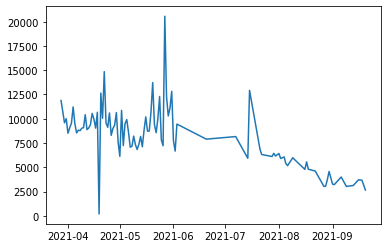

,Unnamed: 0,order_id,variant_id,customer_id,source_id,store_id,order_date,selling_price,quantity,currency,...,R,loyalty_score,variant_name,original_price,category_name,image_link,link,product_name,product_id_y,category_id
811142,811142,UNU17420844,426047,US051501090600105302,Affiliate,1,2021-03-28,9.9,1,USD,...,2,4,BN 1*1ribbed L/S one piece outfit (bee),9.9,BNCover-all (Baby),https://image.uniqlo.com/UQ/ST3/us/imagesgoods...,https://www.uniqlo.com/us/en/newborn-long-slee...,BABY JOY OF PRINT LONG-SLEEVE ONE-PIECE OUTFIT,09352Z,BNCover-all (Baby)
262993,262993,UNU17418336,435096,US621111113496602,Organic Search,1,2021-03-28,24.9,3,USD,...,2,6,Ultra stretch active short pants(7.0),24.9,Cut Pants (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/men-dry-ex-ultra-...,MEN DRY-EX ULTRA STRETCH ACTIVE SHORTS,435096,Cut Pants (Men)
262994,262994,UNU17418347,435096,US621111112104213,Affiliate,1,2021-03-28,24.9,3,NaN,...,2,7,Ultra stretch active short pants(7.0),24.9,Cut Pants (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/men-dry-ex-ultra-...,MEN DRY-EX ULTRA STRETCH ACTIVE SHORTS,435096,Cut Pants (Men)
262995,262995,UNU17418632,435096,US621111115583732,Trigger Email,1,2021-03-28,24.9,1,USD,...,2,5,Ultra stretch active short pants(7.0),24.9,Cut Pants (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/men-dry-ex-ultra-...,MEN DRY-EX ULTRA STRETCH ACTIVE SHORTS,435096,Cut Pants (Men)
262996,262996,UNU17419280,435096,US621111113626729,Direct,1,2021-03-28,24.9,1,NaN,...,2,5,Ultra stretch active short pants(7.0),24.9,Cut Pants (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/men-dry-ex-ultra-...,MEN DRY-EX ULTRA STRETCH ACTIVE SHORTS,435096,Cut Pants (Men)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61447,61447,UNU22621890,435806,US621111112987923,(Other),1,2021-09-20,14.9,2,USD,...,5,8,U AIRism cotton oversized crew neck H/S T-shirt,14.9,Core T S/S (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/u-airism-cotton-o...,MEN U AIRism COTTON CREW NECK OVERSIZED T-SHIRT,14985Z,Core T S/S (Men)
61446,61446,UNU22621304,435806,US621111116366986,Product Listing Ads,1,2021-09-20,14.9,1,USD,...,5,7,U AIRism cotton oversized crew neck H/S T-shirt,14.9,Core T S/S (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/u-airism-cotton-o...,MEN U AIRism COTTON CREW NECK OVERSIZED T-SHIRT,14985Z,Core T S/S (Men)
61445,61445,UNU22607251,435806,US621111116366904,Paid Social,1,2021-09-20,14.9,1,USD,...,5,7,U AIRism cotton oversized crew neck H/S T-shirt,14.9,Core T S/S (Men),https://image.uniqlo.com/UQ/ST3/WesternCommon/...,https://www.uniqlo.com/us/en/u-airism-cotton-o...,MEN U AIRism COTTON CREW NECK OVERSIZED T-SHIRT,14985Z,Core T S/S (Men)
229940,229940,UNU22575514,436870,US621111116156926,Trigger Email,1,2021-09-20,3.9,2,USD,...,5,7,K's Animal Crossing S/S UT A,9.9,UT (Kids),https://image.uniqlo.com/UQ/ST3/us/imagesgoods...,https://www.uniqlo.com/us/en/kids-animal-cross...,KIDS ANIMAL CROSSING UT (SHORT-SLEEVE GRAPHIC ...,15664Z,UT (Kids)


In [4]:
import pandas as pd
from datetime import datetime

#merged = pd.read_csv('../data/merged_transaction_merchandise_09_01_on_variant_id')
merged = pd.read_csv('../data/uniqlo_prod_loy.csv')
merged["order_date"] = [datetime.strptime(x,"%Y-%m-%d") for x in merged["order_date"]]
merged  = merged.sort_values("order_date")


from collections import Counter
import matplotlib.pyplot as plt

c = Counter(merged["order_date"])
plt.plot(c.keys(),c.values())
plt.show()
merged

# Estimating the effect of a buying a certain product

> What is the impact on a client habits of buying a certain product ?

In formal language, we are interested in the Average Treatment Effect on the Treated (ATT). 

We chose the variant 435193 as test product because its buy a lot.

In [17]:
variant = 435193
merged[merged["variant_id"] == variant].head(1)["variant_name"]

variant_name = "truc"
merged[merged["variant_name"] == variant].head(1)["variant_id"]

Series([], Name: variant_id, dtype: int64)

In [66]:
tmp = merged[["customer_id","variant_id","order_date","loyalty_score","category_id"]].copy()
#variant = 435806
variant = 434235
category = "Sweat (Women)"

def date_to_int(d):
    return 10000*d.year + 100*d.month + d.day
#all_cus = {c : date_to_int(d) for v,c,d in zip(tmp["variant_id"],tmp["customer_id"],tmp["order_date"]) if v == variant}
all_cus = {c : date_to_int(d) for v,c,d in zip(tmp["category_id"],tmp["customer_id"],tmp["order_date"]) if v == category}
count_cus = Counter(tmp["customer_id"])
print(len(all_cus))

tmp["treatment"] = [x in all_cus.keys() for x in tmp["customer_id"]]
tmp["buying_date"] = [all_cus.get(x,0) for x in tmp["customer_id"]]
tmp["count_customer"] = [count_cus.get(x,0) for x in tmp["customer_id"]]
print(Counter(tmp["treatment"]))

9934
Counter({False: 750001, True: 61142})


In [67]:
first_loyalty = tmp.groupby("customer_id")["loyalty_score"].first()
last_loyalty = tmp.groupby("customer_id")["loyalty_score"].last()

tmp["first_loyalty"] = [first_loyalty[x] for x in tmp["customer_id"]]
tmp["last_loyalty"] = [last_loyalty[x] for x in tmp["customer_id"]]
tmp

,customer_id,variant_id,order_date,loyalty_score,category_id,treatment,buying_date,count_customer,first_loyalty,last_loyalty
811142,US051501090600105302,426047,2021-03-28,4,BNCover-all (Baby),False,0,5,4,5
262993,US621111113496602,435096,2021-03-28,6,Cut Pants (Men),False,0,4,6,8
262994,US621111112104213,435096,2021-03-28,7,Cut Pants (Men),False,0,28,7,11
262995,US621111115583732,435096,2021-03-28,5,Cut Pants (Men),False,0,12,5,5
262996,US621111113626729,435096,2021-03-28,5,Cut Pants (Men),False,0,3,5,5
...,...,...,...,...,...,...,...,...,...,...
61447,US621111112987923,435806,2021-09-20,8,Core T S/S (Men),False,0,6,9,8
61446,US621111116366986,435806,2021-09-20,7,Core T S/S (Men),False,0,2,7,7
61445,US621111116366904,435806,2021-09-20,7,Core T S/S (Men),False,0,1,7,7
229940,US621111116156926,436870,2021-09-20,7,UT (Kids),False,0,8,7,7


We remove the customers who buy the product in the first or the last time of they purchase (We cannot get a difference of before and after else)

##  I. Formulating the causal model

### The importance of time

We count the number of purchase per days for a customer before it buy the product and after. For the customer which didn't buy this product, we separate its purchase in two parts equals.

,customer_id,buying_date,treatment,first_loyalty,last_loyalty
811142,US051501090600105302,0,False,4,5
262993,US621111113496602,0,False,6,8
262994,US621111112104213,0,False,7,11
262995,US621111115583732,0,False,5,5
262996,US621111113626729,0,False,5,5
...,...,...,...,...,...
61447,US621111112987923,0,False,9,8
61446,US621111116366986,0,False,7,7
61445,US621111116366904,0,False,7,7
229940,US621111116156926,0,False,7,7


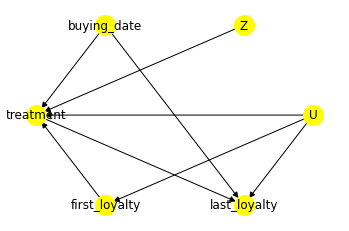

In [68]:
import dowhy
causal_graph = """digraph {
treatment[label="Program Signup in month i"];
first_loyalty;
last_loyalty;
Z->treatment;
U[label="Unobserved Confounders"]; 
first_loyalty -> treatment;
treatment->last_loyalty;
buying_date->last_loyalty;
buying_date->treatment;
U->treatment; U->first_loyalty; U->last_loyalty;
}"""

# Post-process the data based on the graph and the month of the treatment (signup)
# For each customer, determine their average monthly spend before and after month i

df = tmp[["customer_id", "buying_date", "treatment", "first_loyalty", "last_loyalty"]].copy()

model = dowhy.CausalModel(data=df,
                     graph=causal_graph.replace("\n", " "),
                     treatment="treatment",
                     outcome="last_loyalty")
model.view_model()
from IPython.display import Image, display
df

More generally, we can include any activity data for the customer in the above graph. All prior- and post-activity data will occupy the same place (and have the same edges) as the Amount spent node (prior and post respectively). 

## II. Identifying the causal effect
For the sake of this example, let us assume that unobserved confounding does not play a big part. 

In [69]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                           
────────────(Expectation(last_loyalty|first_loyalty,buying_date))
d[treatment]                                                     
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→last_loyalty then P(last_loyalty|treatment,first_loyalty,buying_date,U) = P(last_loyalty|treatment,first_loyalty,buying_date)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(last_loyalty, [Z])*Derivative([treatment], [Z])**(-1))
Estimand assumption 1, As-if-random: If U→→last_loyalty then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{treatment}, then ¬({Z}→last_loyalty)

### Estimand : 3
Estimand name: frontdoor
No such variable found!



## III. Estimating the effect
We now estimate the effect based on the backdoor estimand, setting the target units to "att".

In [70]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor1.propensity_score_matching",
                                target_units="att")
print(estimate)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: last_loyalty~treatment+first_loyalty+buying_date
Target units: att

## Estimate
Mean value: 3.8287102155637696



## IV. Refuting the estimate
We refute the estimate using the placebo treatment refuter. This refuter substitutes the treatment by an independent random variable and checks whether our estimate now goes to zero (it should!).

In [71]:
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter",
                     placebo_type="permute", num_simulations=2)
print(refutation)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Refute: Use a Placebo Treatment
Estimated effect:3.8287102155637696
New effect:-1.31679532890648
p value:0.0



|Variant_id|variant_name|mean value|placebo mean|p-value|
|---|---|---|---|---|
|435193|W's U crew neck S/S T-shirt|3.86|-0.1| |
|437842|W's +J dry sweat pants|-5.15|-0.19|0.2|
|437097|W's U sweat pants|6.02|-0.9|0.0005|
|434235|W's ultra stretch DRY sweat pants|8.22|-1.12|0.0| 
|440748|W's sweat pants|3.76|-1.33|3.47e-06|

|Category_id|mean value|placebo mean|p-value|
|---|---|---|---|
|Solid Blouse (Women)|-6.26|-1.4|0.0|
|Linen Shirts/Blouse (Men)|2.97|-1.35|0.0|
|HEATTECH Inner (Men)|-6.38|-0.66|1.11e-16|
|Sweat (Women)|3.82|-1.31|0.0| 